In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE, ADASYN
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [3]:
cred = pd.read_csv('creditcard.csv')
cred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All variables are numerical and there are no categorical variables (except Class) as all variables are PCA transformed and other is Amount.

In [5]:
cred.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#checking for null values

cols = cred.columns
for i in cols:
    print('{0} = {1}'.format(i, cred[i].isnull().sum()))

Time = 0
V1 = 0
V2 = 0
V3 = 0
V4 = 0
V5 = 0
V6 = 0
V7 = 0
V8 = 0
V9 = 0
V10 = 0
V11 = 0
V12 = 0
V13 = 0
V14 = 0
V15 = 0
V16 = 0
V17 = 0
V18 = 0
V19 = 0
V20 = 0
V21 = 0
V22 = 0
V23 = 0
V24 = 0
V25 = 0
V26 = 0
V27 = 0
V28 = 0
Amount = 0
Class = 0


There are no null values in the dataset

In [7]:
# checking for unique values

for i in cols:
#     print('{0} = {1}'.format(i, cred[i].isnull().sum()))
    print(cred[i].unique)

<bound method Series.unique of 0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64>
<bound method Series.unique of 0         -1.359807
1          1.191857
2         -1.358354
3         -0.966272
4         -1.158233
            ...    
284802   -11.881118
284803    -0.732789
284804     1.919565
284805    -0.240440
284806    -0.533413
Name: V1, Length: 284807, dtype: float64>
<bound method Series.unique of 0         -0.072781
1          0.266151
2         -1.340163
3         -0.185226
4          0.877737
            ...    
284802    10.071785
284803    -0.055080
284804    -0.301254
284805     0.530483
284806    -0.189733
Name: V2, Length: 284807, dtype: float64>
<bound method Series.unique of 0         2.536347
1         0.166480
2         1.773209
3         1.792993
4         1.548718
    

All the columns have non unique values, so we can move on to EDA

Normal = 99.82725143693798 
Fraud = 0.1727485630620034


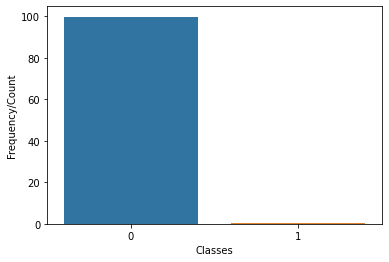

In [8]:
#checking class distribution
classes=cred['Class'].value_counts()
normal=classes[0]/cred['Class'].count()*100
fraud=classes[1]/cred['Class'].count()*100
print('Normal = {0} \nFraud = {1}'.format(normal,fraud))
sns.barplot(x=[1,0], y=[fraud, normal])
plt.xlabel('Classes')
plt.ylabel('Frequency/Count')
plt.show()

from this graph, w can see that the Class variable is highly imbalanced, so we will need to do the balancing of data either seperately with the help of Smote,ADASYN or use class_weigth in the ML models itself

In [9]:
fraud_df = cred[cred.Class == 1][['Amount','Time','Class']]
normal_df = cred[cred.Class == 0][['Amount','Time','Class']]

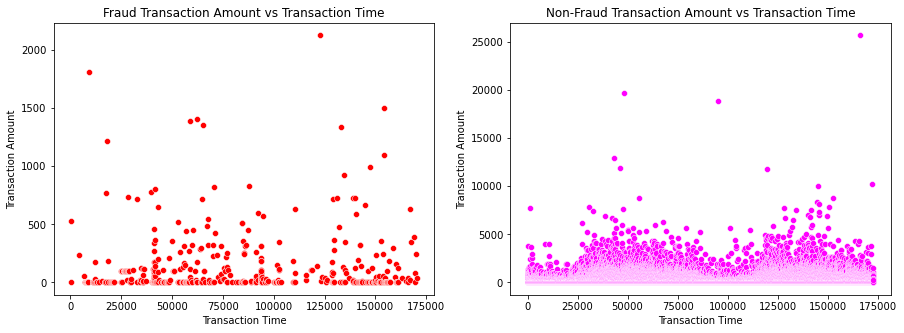

In [10]:
#plotting Class vs Amount
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Fraud Transaction Amount vs Transaction Time")
sns.scatterplot(y=fraud_df.Amount, x=fraud_df.Time, color = 'red')
plt.ylabel('Transaction Amount')
plt.xlabel('Transaction Time')

plt.subplot(1,2,2)
plt.title("Non-Fraud Transaction Amount vs Transaction Time")
sns.scatterplot(y=normal_df.Amount, x=normal_df.Time, color = 'magenta')
plt.ylabel('Transaction Amount')
plt.xlabel('Transaction Time')


plt.show()

From the above graph we can see that the fraudulent amounts detected have been for amount less than 5000

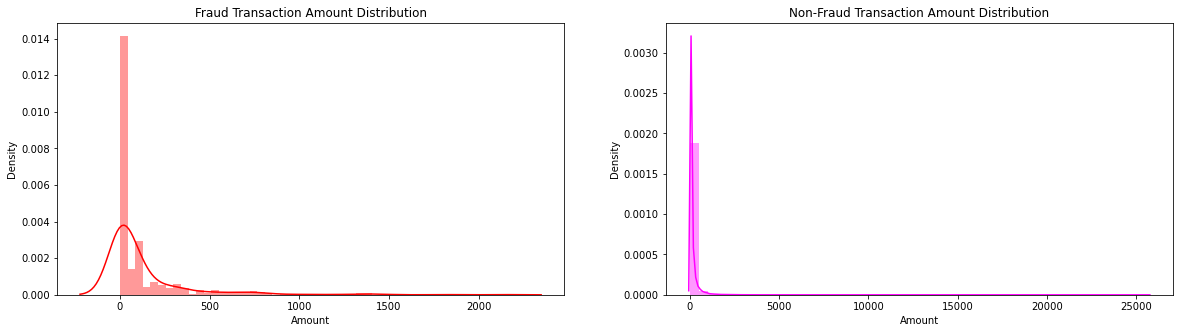

In [11]:
#plottting Amount Distribution of both the fraud and non-fraud classes
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Fraud Transaction Amount Distribution")
sns.distplot(fraud_df.Amount, color = 'red')

plt.subplot(1,2,2)
plt.title("Non-Fraud Transaction Amount Distribution")
sns.distplot(normal_df.Amount, color = 'magenta')
plt.show()

From this we can infer that 
1. **There are a lot of fraud transactions under 500 (possibly to avoid raising suspicions)**
2. **Most of the normal transactions that have been done are below 5000. For normal this is expected as people don't spend very high amounts very frequently.**

### checking if there were any null values after transformation:
for i in cols:
    print('{0} = {1}'.format(i,cred_trans[i].isnull().sum()))

In [12]:
# #Visualizing the distribution after Transformation
# for i,j in enumerate(cols):
#     plt.figure(figsize=(50,10))
#     plt.subplot(2,15,i+1)
#     sns.distplot(cred_trans[j])
#     plt.show()

### Making Train and Test split

In [13]:
X = cred.copy()
X.drop(columns = ['Time','Class'],inplace = True)
y = cred['Class'].copy()
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 42, stratify = y)

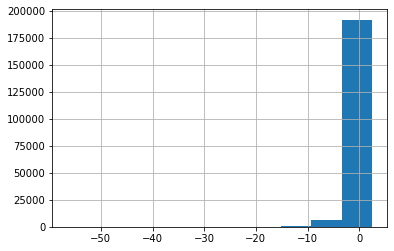

In [15]:
X_train.V1.hist()
plt.show()

In [16]:
#Checking the shape of train set after split
print('X_train = {0}\ny_train = {1}'.format(X_train.shape, y_train.shape))

X_train = (199364, 29)
y_train = (199364,)


In [17]:
#Checking the shape of test set after split
print('X_test = {0}\ny_test = {1}'.format(X_test.shape, y_test.shape))

X_test = (85443, 29)
y_test = (85443,)


### Removing Skewness in Data

All PCA columns have gaussian distribution, so to deal with this, we can transform the column with a function of sklearn called PowerTransformer(). This gives the gaussian distribution of all the variables.

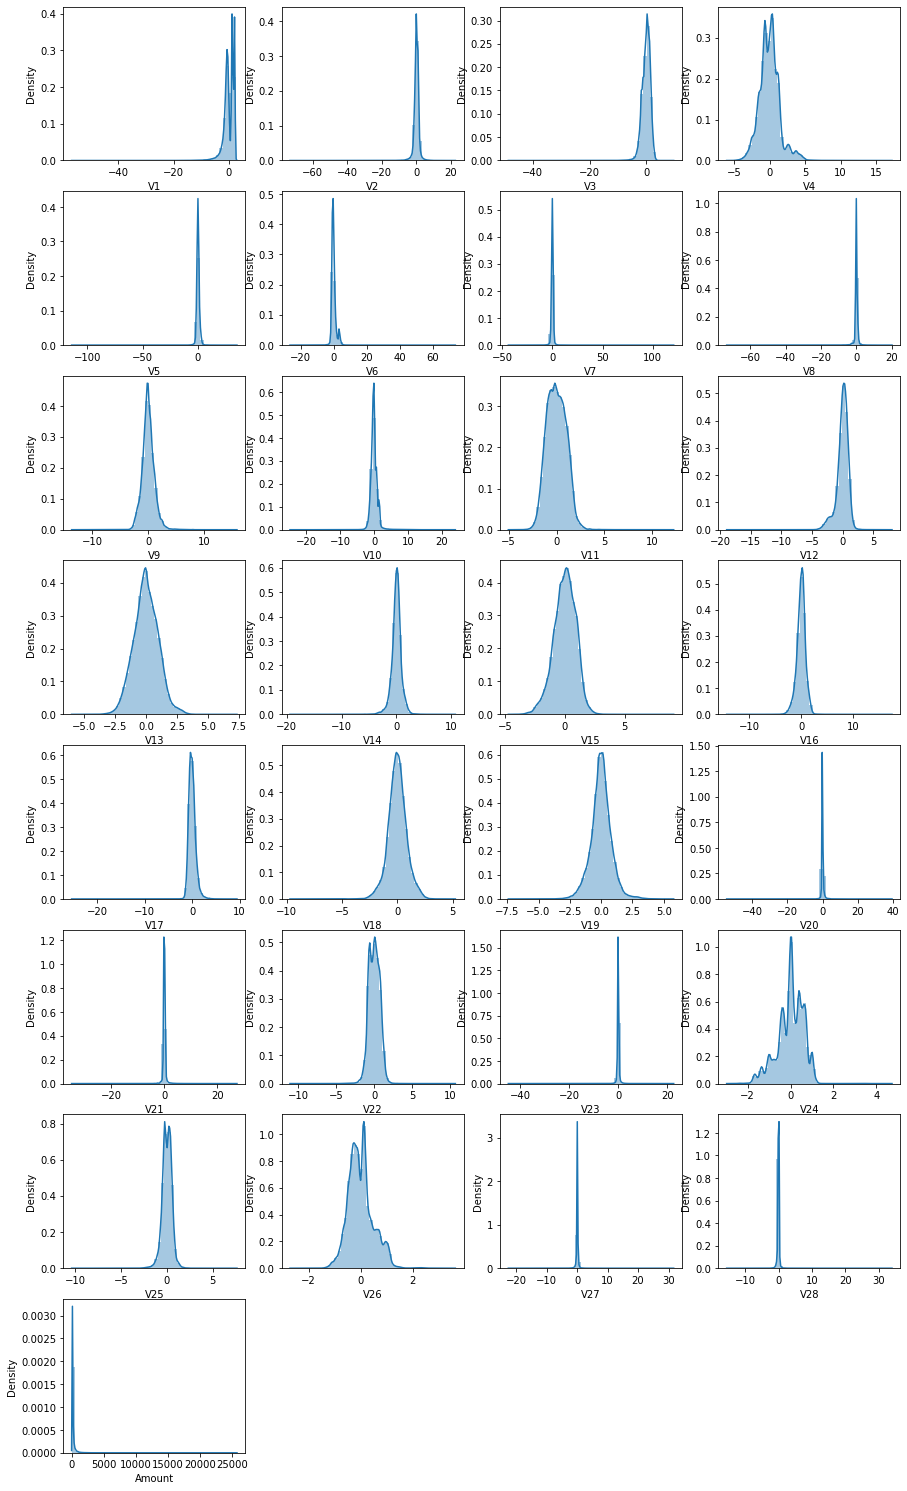

In [18]:
#checking all the Independent Variables for skewness in data
cols= list(X.columns)
plt.figure(figsize=(15,30))
for i,j in enumerate(cols):
    plt.subplot(9,4,i+1)
    sns.distplot(X[j], axlabel = j)
plt.show()

In [19]:
# Checking the level of skewness 
print('Level of Skewness')
for i in cols:
    print('\n{0} = {1}'.format(i, X[i].skew()))

Level of Skewness

V1 = -3.2806673027560405

V2 = -4.624865573285336

V3 = -2.2401554402404193

V4 = 0.676292097985747

V5 = -2.425901495952054

V6 = 1.826580664998085

V7 = 2.553907417429514

V8 = -8.521944194777976

V9 = 0.5546797719063509

V10 = 1.1871405899625278

V11 = 0.35650585548882013

V12 = -2.278400935410618

V13 = 0.06523345790658323

V14 = -1.9951758402683304

V15 = -0.3084229821359239

V16 = -1.100966276051066

V17 = -3.8449144738706202

V18 = -0.25988026809430603

V19 = 0.10919175998147104

V20 = -2.037155299081399

V21 = 3.5929911930778453

V22 = -0.21325762284328822

V23 = -5.875140340106818

V24 = -0.5524993011673045

V25 = -0.4157925903156351

V26 = 0.5766926172084218

V27 = -1.1702089424327133

V28 = 11.19209119221281

Amount = 16.977724453761024


In [20]:
# Trnsforming the whole X_train into gaussian data to remove the skewness 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy = False)

pt.fit(X_train)

PowerTransformer(copy=False)

In [21]:
pt.transform(X_train)
pt.transform(X_test)

array([[-1.3219147 ,  1.32104187, -0.68354035, ..., -0.4448339 ,
        -0.24728806,  0.33284735],
       [-0.40195518,  0.70033947, -0.0056943 , ...,  0.34754881,
         0.42901454, -0.47190914],
       [ 0.12179853, -1.47928504, -0.83588928, ..., -0.24888141,
         0.28212126,  1.94680256],
       ...,
       [ 1.48502918, -0.64373063, -1.06687013, ..., -0.14916882,
        -0.15772833,  0.72358456],
       [ 0.71520254, -0.02015591, -0.29804278, ..., -0.11903965,
         0.02035731, -1.27117686],
       [ 1.61159573, -0.44383285, -0.90296892, ..., -0.1523038 ,
        -0.17657672, -0.16240034]])

In [22]:
X_train= pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,-0.267697,0.404782,-0.037582,-0.495586,0.417461,-0.450219,0.677525,-0.079224,-0.119844,-0.170534,...,-0.052398,-0.305036,-0.796136,0.056456,-0.669016,-0.954144,0.386449,0.578464,0.267038,-0.619494
214082,1.167168,-0.201782,-1.385696,0.868101,0.434724,-0.791180,0.737052,-0.437967,-0.246955,0.508288,...,-0.042231,0.398622,0.722406,-0.385755,-0.641055,0.951240,-0.898773,-0.195537,-0.166521,1.119765
106005,-0.792373,-2.385479,-0.987745,0.403150,-1.478402,-0.554012,1.280349,-0.714879,-1.218243,0.119978,...,2.863557,0.486079,-1.922162,-1.734577,0.838645,-0.304635,1.660302,-0.783775,0.704921,2.265229
58619,-0.538573,0.640442,-0.551757,-0.515036,1.826026,2.172282,0.039457,0.777160,-0.250948,0.158587,...,0.289018,-0.251382,-0.976642,0.224379,1.768707,-1.469473,0.177960,0.016490,0.784726,-0.870972
191638,-0.596658,0.056559,0.052907,-1.351635,1.933233,2.527105,-0.156943,0.944995,0.474378,-0.229042,...,0.196280,0.245843,1.050549,-0.527474,1.382820,-0.198843,1.242931,0.173308,-0.093808,-0.870972


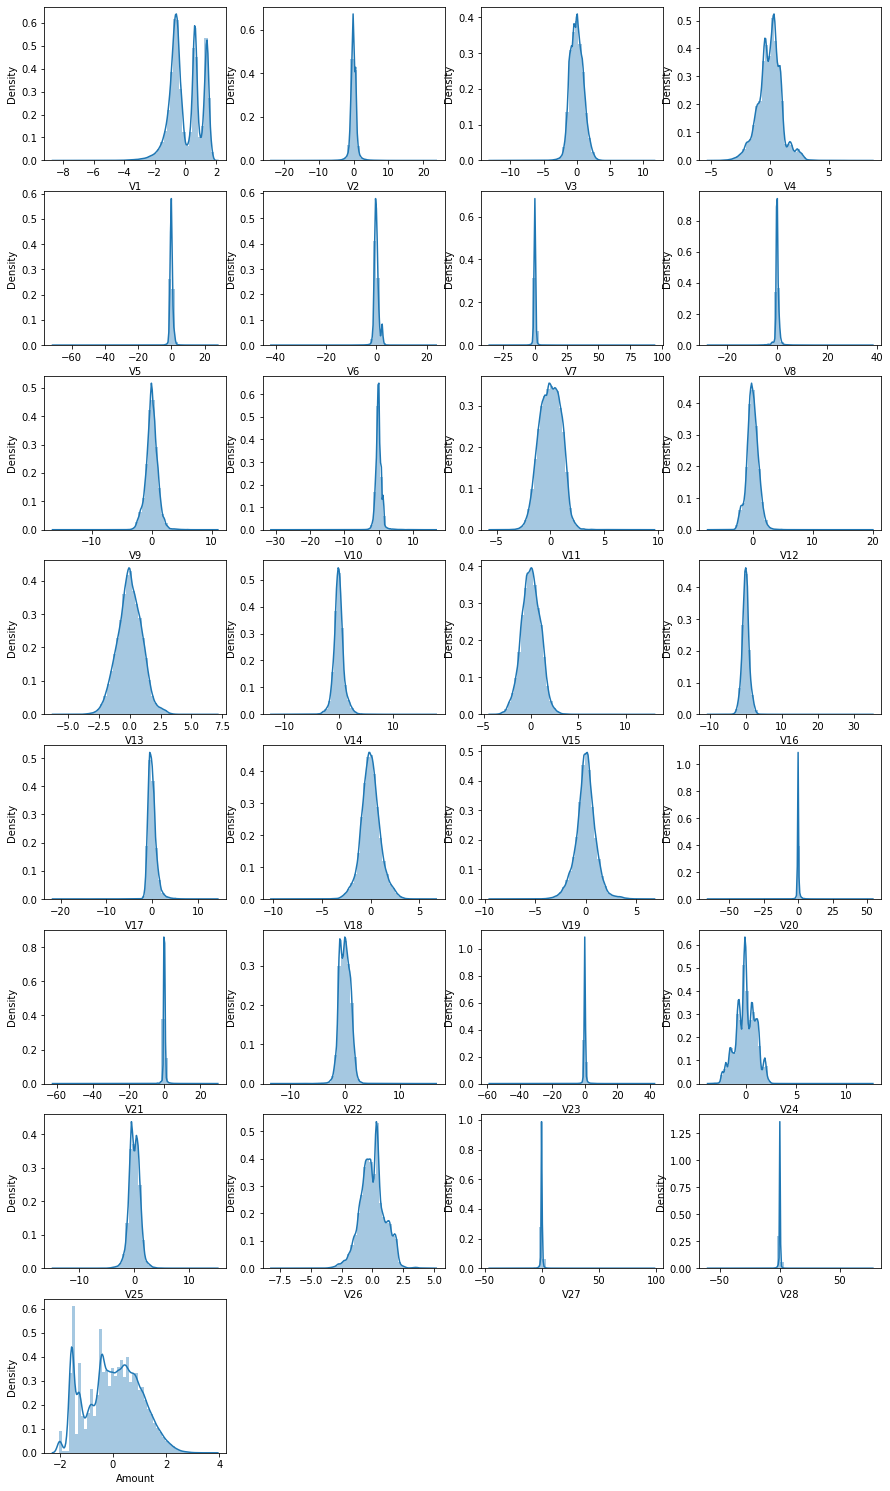

In [23]:
#checking all the Independent Variables for skewness after PowerTransform Gaussian Transformation is applied
cols= list(X.columns)
plt.figure(figsize=(15,30))
for i,j in enumerate(cols):
    plt.subplot(9,4,i+1)
    sns.distplot(X_train[j], axlabel = j)
plt.show()

In [24]:
# Checking the level of skewness after PowerTransform Gaussian Transformation is applied 
print('Level of Skewness')
for i in cols:
    print('\n{0} = {1}'.format(i, X[i].skew()))

Level of Skewness

V1 = -3.2806673027560405

V2 = -4.624865573285336

V3 = -2.2401554402404193

V4 = 0.676292097985747

V5 = -2.425901495952054

V6 = 1.826580664998085

V7 = 2.553907417429514

V8 = -8.521944194777976

V9 = 0.5546797719063509

V10 = 1.1871405899625278

V11 = 0.35650585548882013

V12 = -2.278400935410618

V13 = 0.06523345790658323

V14 = -1.9951758402683304

V15 = -0.3084229821359239

V16 = -1.100966276051066

V17 = -3.8449144738706202

V18 = -0.25988026809430603

V19 = 0.10919175998147104

V20 = -2.037155299081399

V21 = 3.5929911930778453

V22 = -0.21325762284328822

V23 = -5.875140340106818

V24 = -0.5524993011673045

V25 = -0.4157925903156351

V26 = 0.5766926172084218

V27 = -1.1702089424327133

V28 = 11.19209119221281

Amount = 16.977724453761024


## Starting the modeling

This will be done in 3 main stages:-
1. **Try different Modeling techniques with the Raw data i.e. the imbalanced Class(Fraud vs Non Fraud)**
2. **Testing which balancing algorithm gives better results (Smote, Adasyn)**
3. **After Balancing the class, Create different models on that data to see which one gives the best result.**

After all this, we will compare the results of all the models of balanced and imbalanced data, and finally get which model gives the best result. The types of models that will be used in both the cases will be same which will help us in better comparision.

The models that will be used are:-
1. **Logisitic Regression** (testing on the most basic classification algorithm)
2. **Decision trees**
3. **Random Forests**
4. **XGBoost**

We will not KNN because the data set has almost 3 lakh points and KNN performs very slowly on datasets with more than 10,000 data points. So we will not be using this as the number of data points will be increasing as we do Class Balancing.

The performance metric that we will be using to check the model results will be **Precision-Recall** and **AUC-ROC curve**. 

In [25]:
# creating function to do prediction and give results
def evaluate_model(md_opt, X_train, y_train, X_test, y_test):
    md_opt.fit(X_train, y_train)
#     y_train_pred = md_opt.predict(X_train)
    y_pred = md_opt.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    #accuracy score
    acc = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    print("\nAccuracy: {}".format(acc))
    
    ##Compute the overall F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro')
    print("\nF1 Score: {}".format(f1_score))
    
    #compute overall precision score
    precision = metrics.precision_score(y_true=y_test, y_pred=y_pred)
    print("\nPrecision Score: {}".format(precision))
    
    #compute overall recall score
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
    print("\nRecall Score: {}".format(recall))
    
    print("\n---------------Classification Report---------------")
    print(classification_report(y_test, y_pred))
    print("\n---------------AUC ROC Curve---------------")    
    draw_roc(md_opt, X_train, y_train, X_test, y_test)

In [26]:
# creating function to get the roc curve
def draw_roc(mod, X_train, y_train, X_test, y_test):
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''ROC CURVE - TEST DATA'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = mod.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])
    
    '''ROC CURVE - TRAIN DATA '''
    #Use probability scores to compute the ROC Curve
    class_probabilities = mod.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])
    
    plt.figure(figsize=(10,10))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


**Logistic Regression model on unbalanced data**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'C': np.logspace(-5,4,50),
                     'penalty': ['l1','l2'] } #C values used for cross validation

model = LogisticRegression(n_jobs=-1, random_state=42)
grid_search = GridSearchCV(estimator=model, 
                                param_grid=tuned_parameters, 
                                cv=4, scoring='recall',
                                verbose=2,
                                n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=4, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 1.52641797e-05, 2.32995181e-05, 3.55648031e-05,
       5.42867544e-05, 8.28642773e-05, 1.26485522e-04, 1.93069773e-04,
       2.94705170e-04, 4.49843267e-04, 6.86648845e-04, 1.04811313e-03,
       1.59985872e-03, 2.44205309e-03, 3.72759372e-03, 5.68986603e-03,
       8.6...
       1.38949549e+00, 2.12095089e+00, 3.23745754e+00, 4.94171336e+00,
       7.54312006e+00, 1.15139540e+01, 1.75751062e+01, 2.68269580e+01,
       4.09491506e+01, 6.25055193e+01, 9.54095476e+01, 1.45634848e+02,
       2.22299648e+02, 3.39322177e+02, 5.17947468e+02, 7.90604321e+02,
       1.20679264e+03, 1.84206997e+03, 2.81176870e+03, 4.29193426e+03,
       6.55128557e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=2)

In [25]:
#getting the best hyperparameters for this model
log_model = grid_search.best_estimator_
log_model

LogisticRegression(C=0.3906939937054621, n_jobs=-1, random_state=42)

#### Optimum Parameter for Logistic Regression on unbalanced data
- C= 0.3906939937054621.

[[85278    17]
 [   55    93]]

Accuracy: 0.9991573329588147

F1 Score: 0.9991573329588147

Precision Score: 0.8454545454545455

Recall Score: 0.6283783783783784

---------------Classification Report---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.63      0.72       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443


---------------AUC ROC Curve---------------


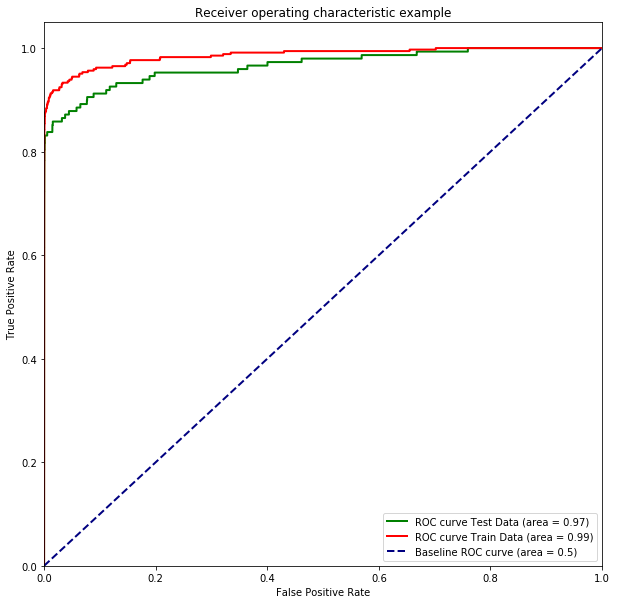

In [26]:
evaluate_model(log_model, X_train, y_train, X_test, y_test)

**Decision tree model on unbalanced data**

In [35]:
dt = DecisionTreeClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 30, 40, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=4, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 84 candidates, totalling 336 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 30, 40, 50, 100]},
             scoring='accuracy', verbose=4)

In [36]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=42)

#### Optimum Parameter for decsion tree on unbalanced data

- Criterion = Entropy
- Max_depth = 5
- min_sample_leaf = 10

In [37]:
dt_opt = grid_search.best_estimator_

[[85280    15]
 [   46   102]]

Accuracy: 0.9992860737567735

F1 Score: 0.9992860737567735

Precision Score: 0.8717948717948718

Recall Score: 0.6891891891891891

---------------Classification Report---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.69      0.77       148

    accuracy                           1.00     85443
   macro avg       0.94      0.84      0.88     85443
weighted avg       1.00      1.00      1.00     85443


---------------AUC ROC Curve---------------


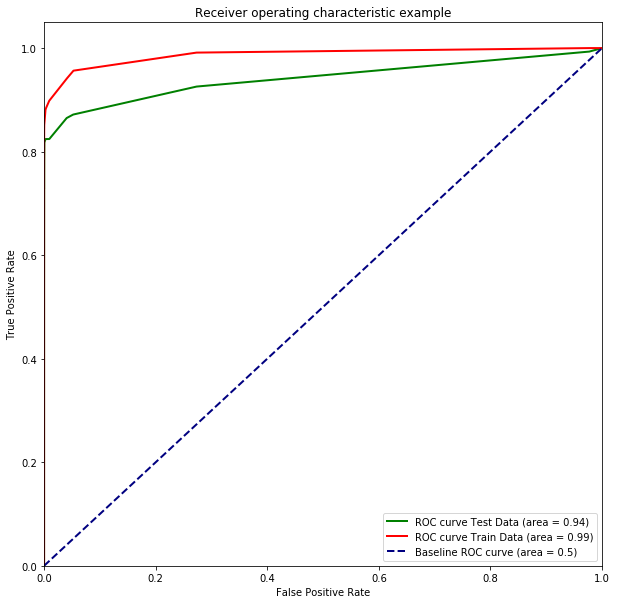

In [38]:
evaluate_model(dt_opt, X_train, y_train, X_test, y_test)

**XGBoost Classifier on Unbalanced Data**

In [ ]:
parameters = {'learning_rate':[0.1,0.2],
                    'n_estimators':[10,20,30],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7],
                    'max_depth': [3,5,10],
                    'colsample_bytree':[0.7,0.8],
                    'gamma':[0,0.5,1]}

model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, 
                                param_grid=parameters, 
                                cv=4, scoring='precision',
                                verbose=4,
                                n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 8640 candidates, totalling 34560 fits


In [ ]:
#most suitable hyperparameter for this model
xg_model=grid_search.best_estimator_
xg_model

In [ ]:
evaluate_model(xg_model, X_train, y_train, X_test, y_test)

### 2. Finding Best Class Balancing Algorithm

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE, ADASYN
X_smote, y_smote = SMOTE().fit_resample(X, y)
X_ada, y_ada = ADASYN().fit_resample(X, y)

In [ ]:
#splitting X_smote and y_smote to train and test variables

X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, train_size=0.7, test_size = 0.3, random_state = 100)

In [ ]:
# running the cross validation for smote variables on decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 30, 40, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, 
                           n_jobs=-1,
                           verbose=1,
                           scoring = "precision")

grid_search.fit(X_train, y_train)

In [ ]:
# optimum hyperparameters for Smote transformations on decision trees/
dt_smote = grid_search.best_estimator_
dt_smote

In [ ]:
evaluate_model(dt_smote, X_train, y_train, X_test, y_test)

#### Now analysing the model results with ADASYN class balancing

In [ ]:
#splitting X_smote and y_smote to train and test variables

X_train, X_test, y_train, y_test = train_test_split(X_ada, y_ada, train_size=0.7, test_size = 0.3, random_state = 42)

In [ ]:
# running the cross validation for smote variables on decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 30, 40, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, 
                           n_jobs=-1,
                           verbose=1,
                           scoring = "precision")

grid_search.fit(X_train, y_train)

In [ ]:
# optimum hyperparameters for Smote transformations on decision trees/
dt_ada = grid_search.best_estimator_
dt_ada

In [ ]:
evaluate_model(dt_ada, X_train, y_train, X_test, y_test)

comparing the results, smote class balancing gave better results on decision trees.

So we will use smote for the final modeling

### 3. Building Models on     Class Balancing Algorithm

As we have already run a Decision Tree with optimized Hyperparameters on the balanced data to find the best Balancing Algorithm, we will keep that result and not run the model again to increase computational efficiency and time.

**Logistic Regression On Balanced Data**

In [ ]:
#Logistic Regression
parameters = {'C': np.logspace(-5,4,50),
                     'penalty': ['l1','l2'] } #C values used for cross validation

model = LogisticRegression(n_jobs=-1, random_state=42)
grid_search = GridSearchCV(estimator=model, 
                                param_grid=parameters, 
                                cv=4, scoring='precision',
                                verbose=1,
                                n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
#getting the best hyperparameters for this model
log_model = grid_search.best_estimator_
log_model

In [ ]:
evaluate_model(log_model, X_train, y_train, X_test, y_test)

**XGBoost Classifier on Balanced Data**

In [ ]:
parameters = {'learning_rate':[0.01,0.1,0.2],
                    'n_estimators':[10,20,30,40,50],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7,9],
                    'max_depth': [3,5,10,20],
                    'colsample_bytree':[0.6,0.7,0.8],
                    'gamma':[0,0.25,0.5,1]}

model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, 
                                param_distributions=parameters, 
                                cv=4, scoring='precision',
                                verbose=4,
                                n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
xg_model= grid_search.best_estimator_
evaluate_model(xg_model, X_train, y_train, X_test, y_test)